# Graph Generation

In [60]:
import os
import pandas as pd
import numpy as np

# 3D plotting utilities
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import proj3d

## Modelling Configuration

In [2]:
# Model input signals, excite the response
signal_types = ["ramp", "step", "sine", "trueHeading"]

## Raw

Let's consider how the raw signals look like:

In [53]:
# Raw data that has been modelled
full_model_data_raw = pd.DataFrame([])
data_folder = './cutoffVariations/shortHeading/'
# Iterate for each column in the data, ie. all sensor model signals
for i in signal_types:
    for j in os.listdir(data_folder):
        if j.startswith(i) and j.endswith("Raw.csv"):
            # Select iteration cutoff frequency from file name (for clearly formatted filenames)
            iteration_cutoff_frequency_raw = j.replace(i, "").replace("Raw.csv", "").replace("_", ".")
            # Check if the string is more than two characters long
            if len(iteration_cutoff_frequency_raw) > 2:
                # Select inital two integers
                initial_integers = iteration_cutoff_frequency_raw[0] + iteration_cutoff_frequency_raw[1]
            # Check if unclean cutoffFrequency string starts with 0
            if ((iteration_cutoff_frequency_raw.startswith("0")) & (iteration_cutoff_frequency_raw.find(".") == -1)):
                iteration_cutoff_frequency = "0." + iteration_cutoff_frequency_raw[1:]
                pass
            # Add decimal point on number within the order of 10^2
            elif ((len(iteration_cutoff_frequency_raw) >= 3) & \
                  (iteration_cutoff_frequency_raw.find(".") == -1) & \
                  (not iteration_cutoff_frequency_raw.startswith("0"))
                 ):
                if (int(initial_integers) < 20):
                    iteration_cutoff_frequency = iteration_cutoff_frequency_raw[0:2] + "." + iteration_cutoff_frequency_raw[1:]
                else:
                    iteration_cutoff_frequency = iteration_cutoff_frequency_raw[0:1] + "." + iteration_cutoff_frequency_raw[1:]
            else:
                iteration_cutoff_frequency = iteration_cutoff_frequency_raw
            
            iteration_read_data_raw = pd.read_csv(data_folder + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data_raw.loc[:, 'cutoffFrequency'] = np.array([float(iteration_cutoff_frequency)] * len(iteration_read_data_raw))
            iteration_read_data_raw.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data_raw))
            # Append into model
            full_model_data_raw = full_model_data_raw.append(iteration_read_data_raw, ignore_index=True)
full_model_data_raw

,time,compassSystem,compassFilter,fullSystem,gyroFilter,gyroSystem,input,error,cutoffFrequency,signalType
0,0.000000,0.000000e+00,0.000000e+00,1.032823,1.032823,1.032823,1.032823,0.000000,0.0010,trueHeading
1,0.000020,4.182930e-10,1.781558e-18,0.005637,0.005637,0.005637,0.005635,0.000003,0.0010,trueHeading
2,0.000039,2.363615e-09,2.836944e-17,2.314524,2.314524,2.314524,2.314518,0.000005,0.0010,trueHeading
3,0.000047,3.724130e-09,5.162738e-17,1.179475,1.179475,1.179475,1.179469,0.000006,0.0010,trueHeading
4,0.000055,5.503082e-09,8.681392e-17,0.849974,0.849974,0.849974,0.849966,0.000007,0.0010,trueHeading
5,0.000061,7.389110e-09,1.281629e-16,1.332472,1.332472,1.332472,1.332464,0.000008,0.0010,trueHeading
6,0.000067,9.250941e-09,1.777982e-16,1.779067,1.779067,1.779067,1.779058,0.000009,0.0010,trueHeading
7,0.000073,1.107221e-08,2.347943e-16,1.738118,1.738118,1.738118,1.738109,0.000010,0.0010,trueHeading
8,0.000078,1.276710e-08,2.956682e-16,2.940470,2.940470,2.940470,2.940459,0.000011,0.0010,trueHeading
9,0.000083,1.472813e-08,3.654008e-16,2.431132,2.431132,2.431132,2.431120,0.000011,0.0010,trueHeading


In [72]:
# Cut down data size
true_heading_model_data_raw = full_model_data_raw[full_model_data_raw.signalType == "trueHeading"]
true_heading_model_data_raw = true_heading_model_data_raw[true_heading_model_data_raw.time.isin(np.arange(0, 340, 2))]
true_heading_model_data_raw

,time,compassSystem,compassFilter,fullSystem,gyroFilter,gyroSystem,input,error,cutoffFrequency,signalType
0,0.0,0.000000,0.000000,1.032823,1.032823,1.032823,1.032823,0.000000,0.0010,trueHeading
1626,2.0,0.740736,0.002171,1.204773,1.202603,1.204653,1.133492,0.071281,0.0010,trueHeading
2205,4.0,13.607825,0.007287,18.744300,18.737013,18.750107,18.633066,0.111234,0.0010,trueHeading
2293,6.0,54.305457,0.086726,60.497150,60.410424,60.502853,60.343436,0.153714,0.0010,trueHeading
2382,8.0,98.762072,0.242762,99.245348,99.002586,99.253386,99.050935,0.194414,0.0010,trueHeading
2480,10.0,96.547650,0.443844,101.917023,101.473179,101.923806,101.651058,0.265965,0.0010,trueHeading
2532,12.0,-124.524625,0.469259,-100.308186,-100.777445,-100.327554,-100.650743,0.342557,0.0010,trueHeading
2552,14.0,-78.126989,0.261282,-100.408915,-100.670197,-100.420881,-100.763548,0.354632,0.0010,trueHeading
2582,16.0,-78.534186,0.046805,-99.784801,-99.831606,-99.782105,-100.213617,0.428816,0.0010,trueHeading
2607,18.0,-95.534507,-0.153200,-90.541093,-90.387893,-90.532459,-90.992372,0.451278,0.0010,trueHeading


In [73]:
# Create multiIndex for all repeated cutoffFrequencies and input signalType
true_heading_model_raw_multiIndex = pd.MultiIndex.from_frame(true_heading_model_data_raw.loc[:, ["cutoffFrequency","signalType"]])
# Remove index columns from DataFrame
true_heading_model_data = true_heading_model_data_raw.loc[:, (true_heading_model_data_raw.columns != "cutoffFrequency") \
                                                       & (true_heading_model_data_raw.columns != "signalType")].set_index(true_heading_model_raw_multiIndex)
true_heading_model_data

time  compassSystem  compassFilter  fullSystem  \
cutoffFrequency signalType                                                    
0.0010          trueHeading   0.0       0.000000       0.000000    1.032823   
                trueHeading   2.0       0.740736       0.002171    1.204773   
                trueHeading   4.0      13.607825       0.007287   18.744300   
                trueHeading   6.0      54.305457       0.086726   60.497150   
                trueHeading   8.0      98.762072       0.242762   99.245348   
                trueHeading  10.0      96.547650       0.443844  101.917023   
                trueHeading  12.0    -124.524625       0.469259 -100.308186   
                trueHeading  14.0     -78.126989       0.261282 -100.408915   
                trueHeading  16.0     -78.534186       0.046805  -99.784801   
                trueHeading  18.0     -95.534507      -0.153200  -90.541093   
                trueHeading  20.0     -84.431258      -0.306434  -70.656255   
                trueHeading  22.0     -53.170382      -0.422687  -38.028710   
                trueHeading  24.0     -47.720254      -0.522714  -40.462927   
                trueHeading  26.0     -47.420477      -0.623596  -53.989738   
                trueHeading  28.0     -51.137750      -0.722127  -47.251688   
                trueHeading  30.0     -51.897905      -0.819602  -56.478419   
                trueHeading  32.0     -48.260182      -0.918190  -59.578347   
                trueHeading  34.0     -49.475319      -1.017298  -36.608432   
                trueHeading  36.0     -51.487417      -1.116027  -36.788924   
                trueHeading  38.0     -49.728424      -1.213370  -59.137748   
                trueHeading  40.0     -49.062156      -1.310646  -59.101460   
                trueHeading  42.0     -50.903076      -1.409750  -41.975545   
                trueHeading  44.0     -38.593232      -1.510019  -43.548069   
                trueHeading  46.0     -80.105407      -1.621677  -53.327269   
                trueHeading  48.0    -150.996115      -1.740785  -98.679467   
                trueHeading  50.0     -80.495453      -1.939164  -98.955272   
                trueHeading  52.0     -64.904274      -2.153951  -47.675640   
                trueHeading  54.0     -53.446842      -2.245640  -48.936074   
                trueHeading  56.0     -44.260562      -2.342980  -48.310359   
                trueHeading  58.0     -45.733764      -2.440640  -48.080537   
...                           ...            ...            ...         ...   
9.9206          trueHeading  12.0    -123.230529    -112.331918 -123.352962   
                trueHeading  14.0     -78.063608     -73.358869  -70.064187   
                trueHeading  16.0     -80.517103     -84.013814  -84.618357   
                trueHeading  18.0     -96.437648    -101.422643  -98.281225   
                trueHeading  20.0     -83.407713     -83.741316  -82.405031   
                trueHeading  22.0     -52.554021     -51.249898  -38.525932   
                trueHeading  24.0     -47.121931     -46.414783  -40.300479   
                trueHeading  26.0     -47.266839     -47.842342  -49.365130   
                trueHeading  28.0     -50.935120     -51.143379  -43.256388   
                trueHeading  30.0     -51.010701     -51.244082  -61.844275   
                trueHeading  32.0     -48.768964     -49.122615  -59.991037   
                trueHeading  34.0     -50.780873     -50.536901  -46.240835   
                trueHeading  36.0     -51.299714     -51.103078  -46.588596   
                trueHeading  38.0     -48.423710     -48.362521  -48.386470   
                trueHeading  40.0     -48.438280     -47.962896  -47.018811   
                trueHeading  42.0     -51.219051     -53.247343  -57.258723   
                trueHeading  44.0     -38.636636     -43.835670  -45.557853   
                trueHeading  46.0     -79.227154     -83.471195  -81.935395   


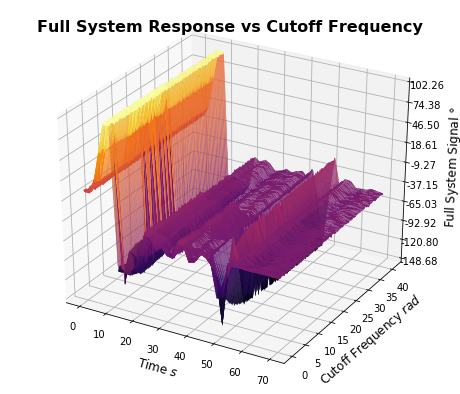

In [74]:
# Add into the figure
fig = plt.figure(0, figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

X = true_heading_model_data_raw.time
Y = true_heading_model_data_raw.cutoffFrequency
Z = true_heading_model_data_raw.fullSystem


# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.inferno, edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title("Full System Response vs Cutoff Frequency", fontweight="bold", fontsize=16)
ax.set_xlabel("Time $s$", fontsize =12)#, fontweight="bold")
ax.set_ylabel("Cutoff Frequency $rad$", fontsize =12)#, fontweight="bold")
ax.set_zlabel("Full System Signal $\degree$", fontsize =12)#, fontweight="bold")

ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

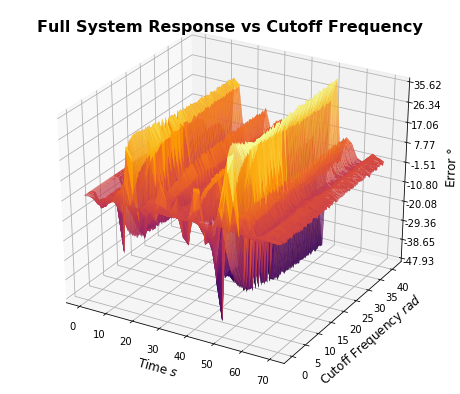

In [75]:
# Add into the figure
fig = plt.figure(0, figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

X = true_heading_model_data_raw.time
Y = true_heading_model_data_raw.cutoffFrequency
Z = true_heading_model_data_raw.error


# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.inferno, edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title("Full System Response vs Cutoff Frequency", fontweight="bold", fontsize=16)
ax.set_xlabel("Time $s$", fontsize =12)#, fontweight="bold")
ax.set_ylabel("Cutoff Frequency $rad$", fontsize =12)#, fontweight="bold")
ax.set_zlabel("Error $\degree$", fontsize =12)#, fontweight="bold")

ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

## Analytics

Note that if we want to model how the system error changes per 

In [ ]:
full_model_data_analytics_raw = pd.DataFrame([])
for i in signal_types:
    # List all the corresponding files
    for j in os.listdir('cutoffVariations'):
        if j.startswith(i) and j.endswith("Analytics.csv"):
            # Select iteration cutoff frequency from file name
            iteration_cutoff_frequency = j.replace(i, "").replace("Analytics.csv", "").replace("_", ".")
            iteration_read_data = pd.read_csv("./cutoffVariations/" + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data.loc[:, 'cutoffFrequency'] = np.array([float(iteration_cutoff_frequency)] * len(iteration_read_data))
            iteration_read_data.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data))
            # Append into model
            full_model_data_analytics_raw = full_model_data_analytics_raw.append(iteration_read_data, ignore_index=True)
full_model_data_analytics_raw

In [ ]:
# Create multiIndex for all model signals signalsNamesOrdered and input signalType
full_model_analytics_multiIndex = pd.MultiIndex.from_frame(full_model_data_analytics_raw.loc[:, ["signalsNamesOrdered","signalType"]])
# Remove index columns from DataFrame
full_model_analytics_data = full_model_data_analytics_raw.loc[:, (full_model_data_analytics_raw.columns != "signalsNamesOrdered") \
                                                       & (full_model_data_analytics_raw.columns != "signalType")].set_index(full_model_analytics_multiIndex)
full_model_analytics_data

In [17]:
model_signal_data = full_model_analytics_data.loc[pd.IndexSlice[model_signal, signal], :]
model_signal_data["cutoffFrequency"] = pd.to_numeric(model_signal_data.loc[:, "cutoffFrequency"])
model_signal_data.sort_values(by="cutoffFrequency")

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cutoffFrequency  firstMomentSignals  \
signalsNamesOrdered signalType                                         
input               trueHeading         0.021388                   0   
                    trueHeading         0.041776                   0   
                    trueHeading         0.062163                   0   
                    trueHeading         0.082551                   0   
                    trueHeading         0.100000                   0   
                    trueHeading         0.101200                   0   
                    trueHeading         0.102940                   0   
                    trueHeading         0.123330                   0   
                    trueHeading         0.143710                   0   
                    trueHeading         0.164100                   0   
                    trueHeading         0.184490                   0   
                    trueHeading         0.201400                   0   
                    trueHeading         0.204880                   0   
                    trueHeading         0.225270                   0   
                    trueHeading         0.245650                   0   
                    trueHeading         0.266040                   0   
                    trueHeading         0.286430                   0   
                    trueHeading         0.301600                   0   
                    trueHeading         0.306820                   0   
                    trueHeading         0.327200                   0   
                    trueHeading         0.347590                   0   
                    trueHeading         0.367980                   0   
                    trueHeading         0.388370                   0   
                    trueHeading         0.401790                   0   
                    trueHeading         0.408760                   0   
                    trueHeading         0.429140                   0   
                    trueHeading         0.449530                   0   
                    trueHeading         0.469920                   0   
                    trueHeading         0.490310                   0   
                    trueHeading         0.501990                   0   
...                                          ...                 ...   
                    trueHeading        33.606100                   0   
                    trueHeading        33.848500                   0   
                    trueHeading        34.090900                   0   
                    trueHeading        34.333300                   0   
                    trueHeading        34.575800                   0   
                    trueHeading        34.818200                   0   
                    trueHeading        35.060600                   0   
                    trueHeading        35.303000                   0   
                    trueHeading        35.545500                   0   
                    trueHeading        35.787900                   0   
                    trueHeading        36.030300                   0   
                    trueHeading        36.272700                   0   
                    trueHeading        36.515200                   0   
                    trueHeading        36.757600                   0   
                    trueHeading        37.000000                   0   
                    trueHeading        37.242400                   0   
                    trueHeading        37.484800                   0   
                    trueHeading        37.727300                   0   
                    trueHeading        37.969700                   0   
                    trueHeading        38.212100                   0   
                    trueHeading        38.454500                   0   
                    trueHeading        38.697000                   0   
                    trueHeading        38.939400                   0   
 

In [61]:
signal = "trueHeading"
i = 0
# Select all analytic metrics except cutoffFrequency
for analytic_metric in full_model_analytics_data.columns[full_model_analytics_data.columns != "cutoffFrequency"]:
    if analytic_metric.find("Correlation") == -1: # Not selecting rows that do not contain correlations
        for model_signal in full_model_analytics_data.index.levels[0]: # model signals signalsNamesOrdered list
            # Index per model signals signalsNamesOrdered for only for one input signalType
            model_signal_data = full_model_analytics_data.loc[pd.IndexSlice[model_signal, signal], :] # Surely there must be a more memory efficient way of doing this
            # Convert to numeric
            model_signal_data["cutoffFrequency"] = pd.to_numeric(model_signal_data.loc[:, "cutoffFrequency"])
            model_signal_data.sort_values(by="cutoffFrequency")

            plt.figure(i)
            plt.plot(model_signal_data.cutoffFrequency, model_signal_data[analytic_metric], '.',label=model_signal)
            plt.title(analytic_metric)
            plt.ylabel('Magnitude')
            plt.xlabel('Frequency rad/s')
            plt.xscale('log')
        i+=1
        plt.legend(loc="upper right")

NameError: name 'full_model_analytics_data' is not defined

## Analytics for all signals


So how will we determine the error from each signal accordingly? Let's assume it's propotional. We know the cutoff frequency determines how much of the compass dominates the response, and because its complementary, this also means how much of the gyro is not present in the response. So we want to know what is the error proportionality. We could in theory see the frequency response of the signals that we have, and compare as that changes. Do we have to create our own fast fourier transform response? Let's do it to see what happens.

How do we determine the error proportionality. We can consider a simple step signal case.

See [these references for plot_surface](https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib) and [this](https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe).

It would be inaccurate to linearly substract the value between the error and the 

We can model small UAV data of https://ieeexplore.ieee.org/abstract/document/6095129 and [A minimalist control strategy for small UAVs](https://ieeexplore.ieee.org/abstract/document/5354465), [Understanding Autonomous Drone Maneuverability
for Internet of Things Applications](https://research.csiro.au/ng/wp-content/uploads/sites/106/2016/08/Understanding-Autonomous-cameraready-2017.pdf). Here's the [Phantom 2 datasheet Max Angular Speed	150°/s](https://www.dji.com/uk/phantom-3-pro/info). [Mavic 2 pro Max Angular Velocity	200°/s](https://www.dji.com/uk/mavic-2/info#specs).

In [19]:
trueHeadingModel = full_model_analytics_data.loc[pd.IndexSlice[:, "trueHeading"], :]
trueHeadingModel["cutoffFrequency"] = pd.to_numeric(trueHeadingModel.loc[:, "cutoffFrequency"])
trueHeadingModel

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,,cutoffFrequency,firstMomentSignals,fourthMomentSignals,kurtosisCorrelationSignals,kurtosisSignals,maxCorrelationSignals,maxSignals,meanCorrelationSignals,meanSignals,minSignals,...,powerSignals,rmsCorrelationSignals,rmsSignals,secondMomentSignals,skewnessSignals,standardDeviationSignals,standardDeviationSignals_1,thirdMomentSignals,varCorrelationSignals,varianceSignals
signalsNamesOrdered,signalType,,,,,,,,,,,,,,,,,,,,,
compassSystem,trueHeading,0.021388,0,1.557729e+07,4.710829,4.629832,16359.104384,104.009725,-6050.993784,-14.224991,-162.096067,...,0.003841,13607.832492,45.128931,1834.270055,-0.152877,12189.330490,12189.330490,-12009.872793,1.485798e+08,1834.793534
compassFilter,trueHeading,0.021388,0,1.071090e+05,4.864257,3.367593,1413.758193,10.550538,-2903.251219,-6.825114,-39.195879,...,0.003779,5952.215695,14.997465,178.341782,-1.353900,5196.523528,5196.523528,-3224.528563,2.700386e+07,178.392679
fullSystem,trueHeading,0.021388,0,1.115249e+07,4.679243,3.914191,16418.045917,102.675318,-5758.358142,-13.537048,-102.385556,...,0.003899,13430.911544,43.257627,1687.970599,0.056869,12134.731367,12134.731367,3943.893210,1.472517e+08,1688.452325
gyroFilter,trueHeading,0.021388,0,8.040107e+06,4.679243,5.696860,16418.045917,96.574732,-5758.358142,-6.711934,-109.703436,...,0.005285,13430.911544,35.114685,1187.991025,-0.151186,12134.731367,12134.731367,-6190.575571,1.472517e+08,1188.330064
gyroSystem,trueHeading,0.021388,0,1.113934e+07,4.945246,3.940739,15509.914033,102.800724,-2855.106923,-13.420113,-101.714121,...,0.003908,7858.797433,43.143745,1681.283321,0.061119,7322.343289,7322.343289,4213.464185,5.361671e+07,1681.763139
input,trueHeading,0.021388,0,1.128704e+07,4.680781,3.876081,16449.322097,102.530091,-5708.616678,-13.779739,-102.953247,...,0.003891,13343.636392,43.546890,1706.450375,0.046624,12061.719806,12061.719806,3286.647599,1.454851e+08,1706.937376
error,trueHeading,0.021388,0,2.677914e-02,4.024528,2.876739,544.612487,1.404792,103.235590,0.242692,-0.040723,...,0.001653,178.158105,0.394185,0.096482,1.096165,145.209269,145.209269,0.032851,2.108573e+04,0.096510
compassSystem,trueHeading,0.041776,0,1.202913e+07,7.569183,5.177335,9210.129521,104.908212,-2886.087095,-10.377215,-162.330215,...,0.004934,7465.309706,40.397572,1524.277244,-0.073025,6885.359436,6885.359436,-4345.759382,4.740817e+07,1524.716138
compassFilter,trueHeading,0.041776,0,3.699523e+05,5.798223,3.475102,1290.926181,19.381347,-2383.526096,-8.570207,-51.215902,...,0.004215,5093.063538,19.993185,326.279001,-1.358372,4501.223841,4501.223841,-8005.756920,2.026102e+07,326.372949


In [20]:
errorTrueHeading = trueHeadingModel.loc[pd.IndexSlice["error", "trueHeading"], ["cutoffFrequency", "minSignals",\
                                                                                "maxSignals", "minCorrelationSignals", "maxCorrelationSignals"]]
errorTrueHeading.sort_values("cutoffFrequency", ascending=False)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:969: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


cutoffFrequency  minSignals  maxSignals  \
signalsNamesOrdered signalType                                             
error               trueHeading        40.636400  -63.009229   74.270454   
                    trueHeading        40.393900  -63.409435   75.027413   
                    trueHeading        40.151500  -62.842840   75.704922   
                    trueHeading        39.909100  -62.992717   74.599993   
                    trueHeading        39.666700  -62.858882   75.352907   
                    trueHeading        39.424200  -62.945176   75.300801   
                    trueHeading        39.181800  -63.071275   74.516247   
                    trueHeading        38.939400  -63.474854   74.896026   
                    trueHeading        38.697000  -62.923859   74.837716   
                    trueHeading        38.454500  -62.876453   75.134959   
                    trueHeading        38.212100  -62.605574   75.301959   
                    trueHeading        37.969700  -62.724562   74.660430   
                    trueHeading        37.727300  -63.132723   75.521677   
                    trueHeading        37.484800  -62.250134   75.490794   
                    trueHeading        37.242400  -62.806508   74.483652   
                    trueHeading        37.000000  -62.154065   74.994487   
                    trueHeading        36.757600  -63.154625   74.280729   
                    trueHeading        36.515200  -62.502143   74.508768   
                    trueHeading        36.272700  -63.350994   75.432220   
                    trueHeading        36.030300  -63.202376   74.988643   
                    trueHeading        35.787900  -62.713738   75.010578   
                    trueHeading        35.545500  -63.542226   75.611148   
                    trueHeading        35.303000  -62.503884   75.130608   
                    trueHeading        35.060600  -62.899762   74.268841   
                    trueHeading        34.818200  -63.154250   74.319368   
                    trueHeading        34.575800  -63.066998   74.611472   
                    trueHeading        34.333300  -63.052170   73.977128   
                    trueHeading        34.090900  -62.515473   74.196226   
                    trueHeading        33.848500  -62.981533   74.538315   
                    trueHeading        33.606100  -62.576521   74.265806   
...                                          ...         ...         ...   
                    trueHeading         0.501990  -11.541582   13.454016   
                    trueHeading         0.490310  -11.256776   13.341974   
                    trueHeading         0.469920  -10.982621   12.924600   
                    trueHeading         0.449530  -10.245658   12.440379   
                    trueHeading         0.429140   -9.906998   11.901948   
                    trueHeading         0.408760   -9.361040   11.506092   
                    trueHeading         0.401790   -9.253142   11.401031   
                    trueHeading         0.388370   -9.024891   11.101766   
                    trueHeading         0.367980   -8.287493   10.641114   
                    trueHeading         0.347590   -7.841262   10.039021   
                    trueHeading         0.327200   -7.345200    9.545606   
                    trueHeading         0.306820   -6.853174    9.275508   
                    trueHeading         0.301600   -6.767726    8.933972   
                    trueHeading         0.286430   -6.443434    8.677195   
                    trueHeading         0.266040   -5.901500    8.139303   
                    trueHeading         0.245650   -5.401666    7.584388   
                    trueHeading         0.225270   -4.890022    6.983225   
                    trueHeading         0.204880   -4.309296    6.433992   
                    trueHeading         0.201400   -4.403072    6.294371   
                    trueHeading         0.184490   -3.995018    5.865248   
     

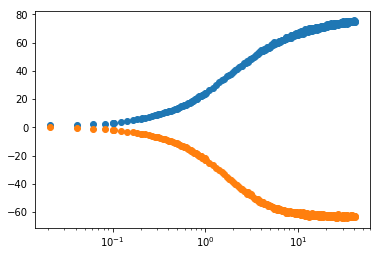

In [21]:
plt.plot(errorTrueHeading["cutoffFrequency"], errorTrueHeading["maxSignals"], 'o', \
         errorTrueHeading["cutoffFrequency"], errorTrueHeading["minSignals"], 'o')
plt.xscale('log')